# Problem Statement

***An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.***

***The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.***

***X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.***

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools

## Importing the datasets

In [2]:
initial_leads = pd.read_csv('D:/Data Science M.S/Business Case Study/Lead Scoring Assignment/Leads.csv')
initial_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
initial_leads.shape

(9240, 37)

## Understading the structure and quality of data

In [4]:
initial_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<AxesSubplot:>

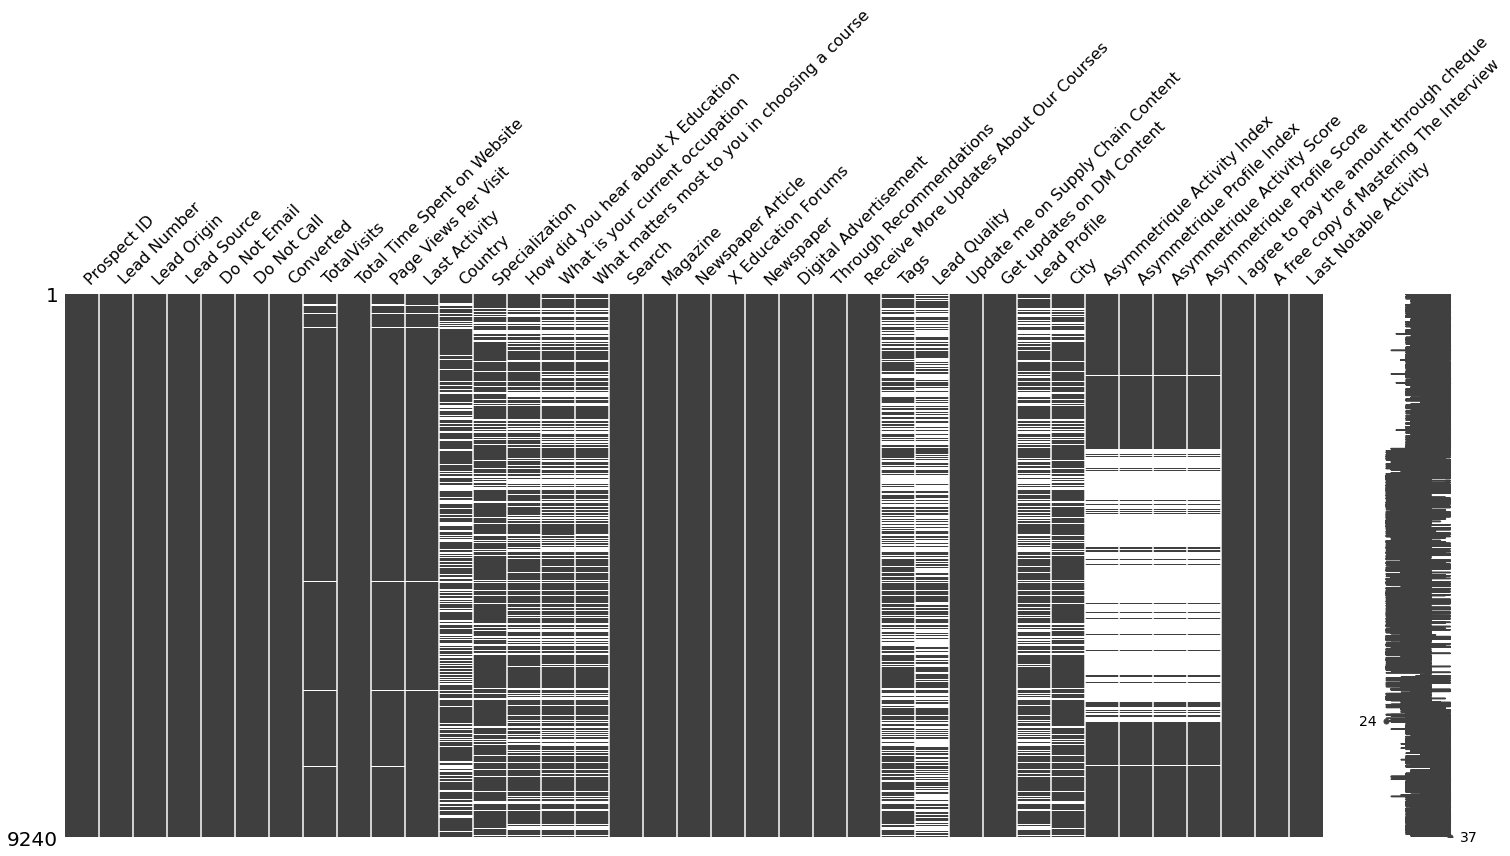

In [5]:
import missingno as mn
mn.matrix(initial_leads)

In [6]:
col_info= round(initial_leads.isnull().sum() / initial_leads.shape[0] * 100.00,2)
col_info.sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## Data Cleaning and Preparation

##### We can remove the columns which have more than 30% of missing data

In [7]:
col_info_gt_30 = col_info[col_info>30]
col_info_gt_30 = list(col_info_gt_30.index)
col_info_gt_30

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [8]:
leads = initial_leads.drop(columns= col_info_gt_30)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [9]:
leads.shape

(9240, 31)

In [10]:
col_info_new= round(leads.isnull().sum() / leads.shape[0] * 100.00,2)
col_info_new.sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

## Data Analysis on missing columns

In [11]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### There is huge imbalance in data so we can drop this column

In [12]:
leads.drop(columns= 'What matters most to you in choosing a course',inplace=True)

In [13]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

##### Most of the users have not selected the lead profile so this column can also be dropped as it does not give any useful information.

In [14]:
leads.drop(columns= 'Lead Profile',inplace=True)

In [15]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
leads['What is your current occupation'].isnull().sum()

2690

##### Firstly this column has a huge data imbalance among classes so our model may be biased. Secondly it has 2690 null records. So, although it seems an important factor to target variable we have to drop this variable.

In [17]:
leads.drop(columns= 'What is your current occupation',inplace=True)

In [18]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

##### Again there is a huge data imbalance. This column is important for user information but it does help us in predicting customer behaviour so we can drop this column

In [19]:
leads.drop(columns= 'Country',inplace=True)

In [20]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

##### Almost half of the users have not provided input for this section so it can be dropped.

In [21]:
leads.drop(columns= 'How did you hear about X Education',inplace=True)

In [22]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### Now we can replace the Select category and null values with unknown 

In [23]:
leads['Specialization'].fillna('Unknown',inplace=True)
leads['Specialization'].replace('Select','Unknown',inplace=True)

In [24]:
leads['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### Although it has data imbalance but it seems an important attribute in regards with target variable so we can keep this column for now.


In [25]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### It seems like it is Mumbai is appearing as exact city name and most of the rows does not have any value. Also city column does not have direct impact on predicting whether a lead will scored or not so we can drop this column

In [26]:
leads.drop(columns= 'City',inplace=True)

In [27]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### We can impute the missing values with mean

In [28]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean(),inplace=True)

In [29]:
leads['TotalVisits'].fillna(leads['TotalVisits'].mean(),inplace=True)

In [30]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### We can impute the missing data with Unknown variable

In [31]:
leads['Last Activity'].fillna('Unknown',inplace=True)

In [32]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### We can inpute this using mode

In [33]:
leads['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [34]:
leads['Lead Source'].fillna(leads['Lead Source'].mode,inplace=True)

##### Now we can also drop Prospect ID column as it's only customer identification column and to identify the leads we have Lead Number column

In [35]:
leads.drop(columns= 'Prospect ID',inplace=True)

In [36]:
leads.isna().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [37]:
leads.shape

(9240, 24)

##### Now our data has been cleaned with 24 columns and 9240 records

In [38]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


## Exploratory Data Analysis

In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Specialization                      

In [40]:
cat_cols = [col for col in leads.columns if leads[col].dtype =='object']
len(cat_cols)

19

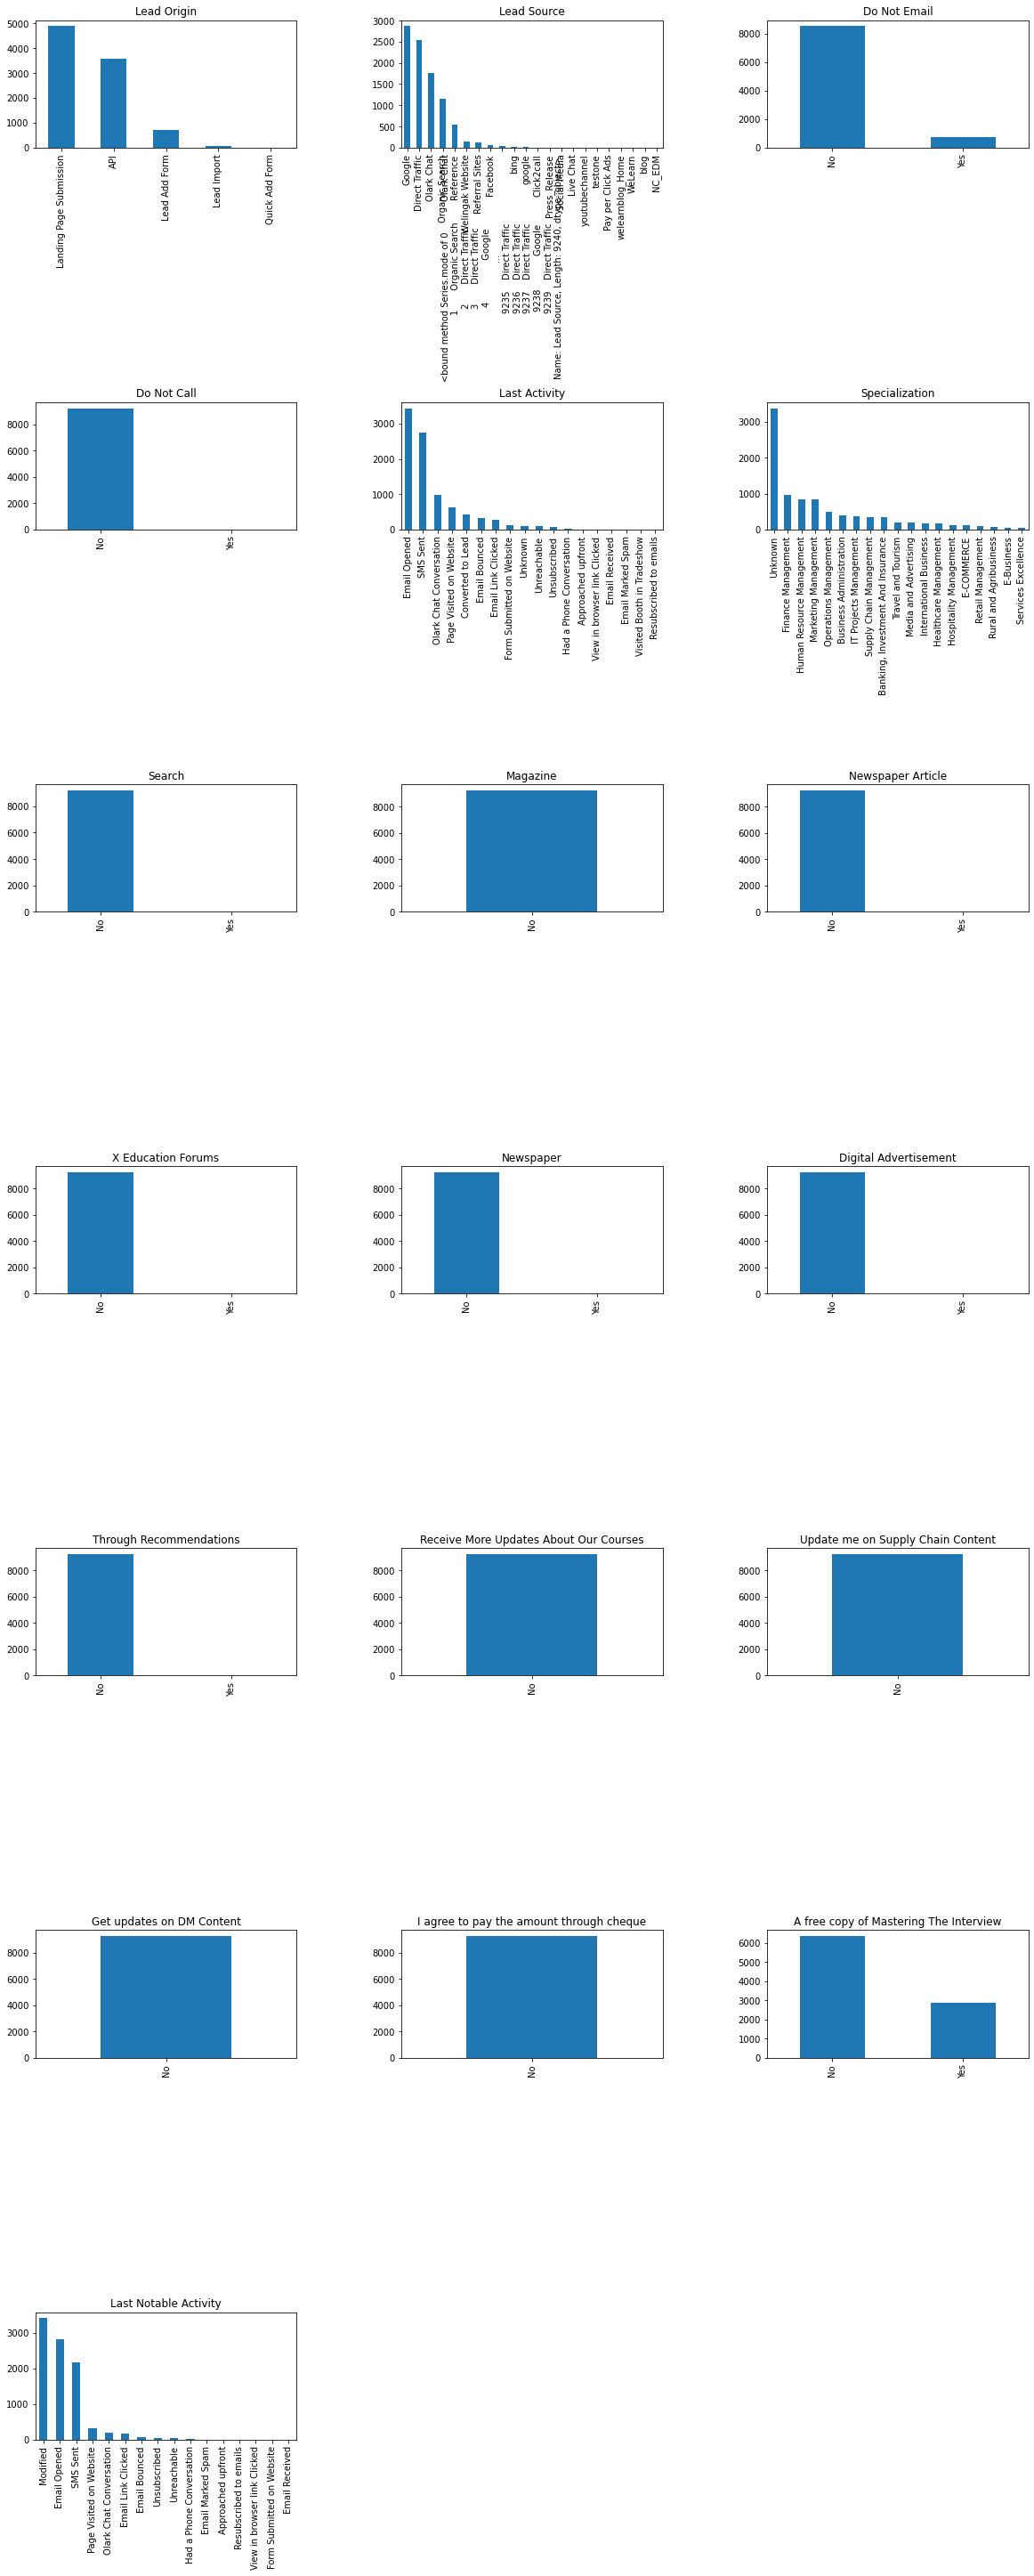

In [41]:
plt.figure(figsize=(20,50))
#fig, axs = plt.subplots(19)
for column,pos in itertools.zip_longest(cat_cols,range(len(cat_cols))):
    plt.subplot(7,3,pos+1)
    plt.subplots_adjust(
                    wspace=0.4,
                    hspace=2)
    axs=leads[column].value_counts().plot.bar()
    plt.title(column)

##### There is very heavy data imbalance in our columns, so we need to drop such columns

In [42]:
cols_with_data_imbalance = [
 'Lead Source',
 'Last Activity',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [43]:
leads.drop(columns=cols_with_data_imbalance, inplace=True)

In [44]:
leads.shape

(9240, 9)

In [45]:
leads.head()

,Lead Number,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0.0,0,0.0,Unknown,No,Modified
1,660728,API,0,5.0,674,2.5,Unknown,No,Email Opened
2,660727,Landing Page Submission,1,2.0,1532,2.0,Business Administration,Yes,Email Opened
3,660719,Landing Page Submission,0,1.0,305,1.0,Media and Advertising,No,Modified
4,660681,Landing Page Submission,1,2.0,1428,1.0,Unknown,No,Modified


<AxesSubplot:>

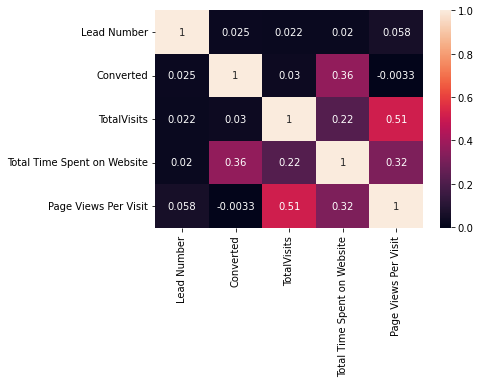

In [46]:
sns.heatmap(leads.corr(),annot=True)

#### Relationship between categorical columns and target column

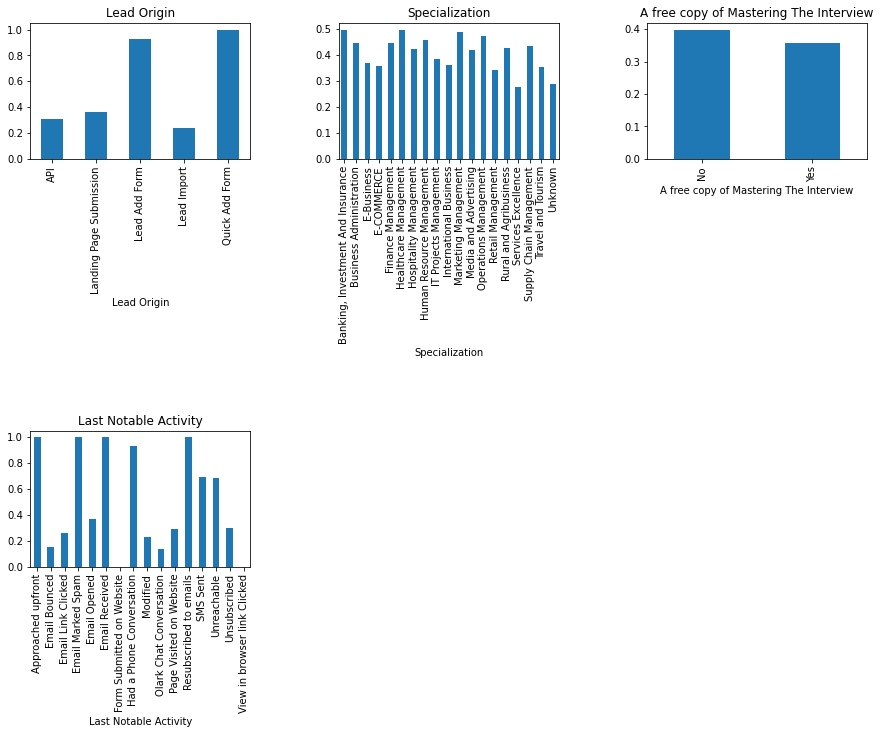

In [48]:
plt.figure(figsize=(15,10))
cat_cols_new = ['Lead Origin','Specialization','A free copy of Mastering The Interview','Last Notable Activity']
for column,pos in itertools.zip_longest(cat_cols_new,range(len(cat_cols_new))):
    plt.subplot(2,3,pos+1)
    plt.subplots_adjust(
                    wspace=0.4,
                    hspace=2)
    axs=leads.groupby([column])['Converted'].mean().plot.bar()
    plt.title(column)

In [49]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Relationship between categorical columns and target column

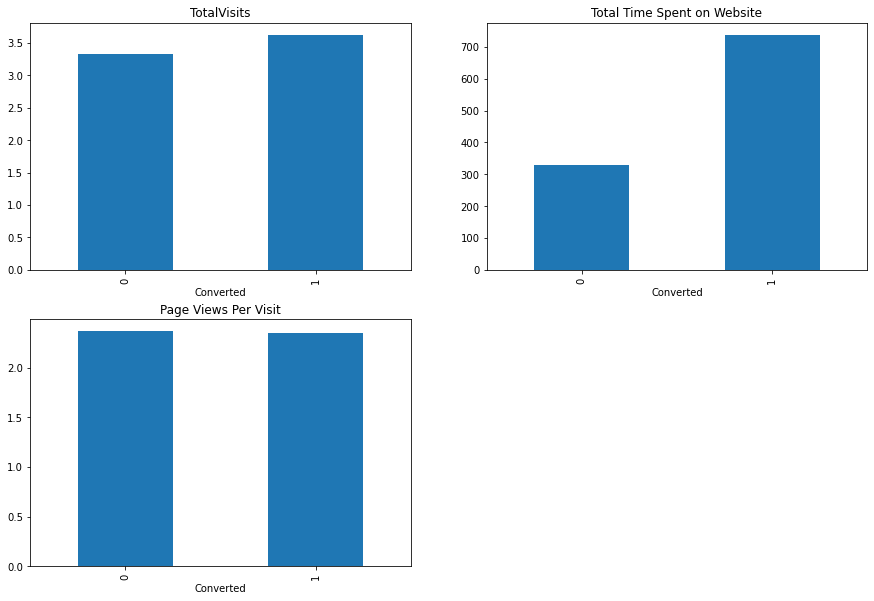

In [47]:
plt.figure(figsize=(15,10))
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for column,pos in itertools.zip_longest(num_cols,range(len(num_cols))):
    plt.subplot(2,2,pos+1)
    axs=leads.groupby(['Converted'])[column].mean().plot.bar()
    plt.title(column)

#### The mean time spent by people on website is 700 for the leads who got converted as compared to around 300 for leads who did not get converted

##### Outlier Detection

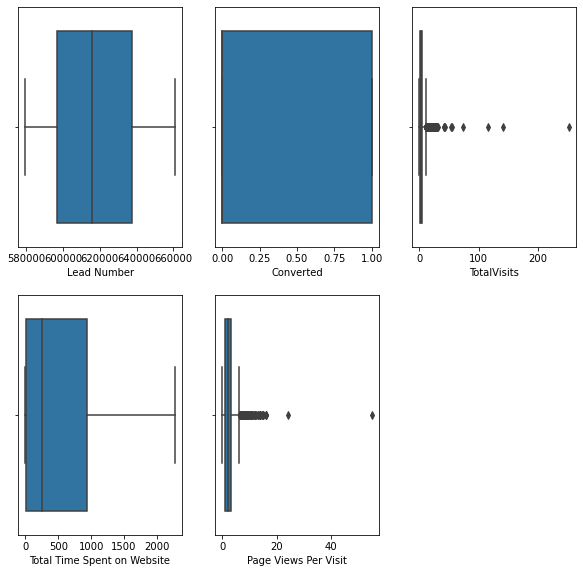

In [50]:
num_cols = ['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(10,15))
for i,col in itertools.zip_longest(range(len(num_cols)),num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(leads[col])
    

In [51]:
leads.shape

(9240, 9)

In [52]:
outlier_mask = (leads['TotalVisits'] > 100) | (leads['Page Views Per Visit'] > 20)

In [53]:
leads = leads[~outlier_mask]

In [54]:
leads.shape

(9235, 9)

## Data Preparation

##### Converting categorigal columns into dummy columns

In [55]:
leads.head()

,Lead Number,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0.0,0,0.0,Unknown,No,Modified
1,660728,API,0,5.0,674,2.5,Unknown,No,Email Opened
2,660727,Landing Page Submission,1,2.0,1532,2.0,Business Administration,Yes,Email Opened
3,660719,Landing Page Submission,0,1.0,305,1.0,Media and Advertising,No,Modified
4,660681,Landing Page Submission,1,2.0,1428,1.0,Unknown,No,Modified


In [56]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9235 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9235 non-null   int64  
 1   Lead Origin                             9235 non-null   object 
 2   Converted                               9235 non-null   int64  
 3   TotalVisits                             9235 non-null   float64
 4   Total Time Spent on Website             9235 non-null   int64  
 5   Page Views Per Visit                    9235 non-null   float64
 6   Specialization                          9235 non-null   object 
 7   A free copy of Mastering The Interview  9235 non-null   object 
 8   Last Notable Activity                   9235 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 721.5+ KB


In [57]:
var_cols = ['Lead Origin','Specialization','A free copy of Mastering The Interview','Last Notable Activity']

In [58]:
var_cols_new = pd.get_dummies(leads[var_cols], drop_first=True)
var_cols_new.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
leads_final = pd.concat([leads, var_cols_new], axis = 1)

In [60]:
leads_final.drop(columns=var_cols,inplace=True)

In [61]:
leads_final = leads_final.set_index('Lead Number')

In [62]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = leads_final.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Putting target variable into y
y = leads_final['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
592648,2.0,1601,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
649186,6.0,1377,6.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
599615,4.0,313,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
593559,4.0,104,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629447,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
592648,-0.386451,2.030247,-0.171557,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
649186,0.739675,1.621313,1.778160,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
599615,0.176612,-0.321122,0.803302,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
593559,0.176612,-0.702672,-0.171557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629447,-0.949515,-0.892534,-1.146415,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
### Checking the Conversion Rate
conversion = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
conversion

38.53817000541419

## Model Building

In [71]:
import statsmodels.api as sm

In [72]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 26 Feb 2023   Deviance:                       7230.5
Time:                        19:16:25   Pearson chi2:                 6.76e+16
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -1.365e+13      9e+06  -1.52e+06      0.000   -1.36e+13   -1.36e+13
TotalVisits                                            0.1248      0.043      2.914      0.004       0.041       0.209
Total Time Spent on Website                            1.0092      0.037     27.549      0.000       0.937       1.081
Page Views Per Visit                                  -0.2798      0.049     -5.754      0.000      -0.375      -0.185
Lead Origin_Landing Page Submission                   -1.3799      0.121    -11.447      0.000      -1.616      -1.144
Lead Origin_Lead Add Form                              3.2710      0.179     18.259      0.000       2.920       3.622
Lead Origin_Lead Import                               -0.1391      0.392     -0.355      0.723      -0.908       0.629
Lead Origin_Quick Add Form                         -1.952e+07      0.571  -3.42e+07      0.000   -1.95e+07   -1.95e+07
Specialization_Business Administration                -0.1815      0.228     -0.794      0.427      -0.629       0.266
Specialization_E-Business                             -0.1976      0.451     -0.438      0.661      -1.081       0.686
Specialization_E-COMMERCE                             -0.0460      0.321     -0.143      0.886      -0.674       0.582
Specialization_Finance Management                     -0.1836      0.198     -0.929      0.353      -0.571       0.204
Specialization_Healthcare Management                  -0.1223      0.315     -0.389      0.698      -0.739       0.494
Specialization_Hospitality Management                 -0.8317      0.364     -2.283      0.022      -1.546      -0.118
Specialization_Human Resource Management              -0.2499      0.201     -1.246      0.213      -0.643       0.143
Specialization_IT Projects Management                 -0.3018      0.239     -1.262      0.207      -0.770       0.167
Specialization_International Business                 -0.5604      0.302     -1.853      0.064      -1.153       0.032
Specialization_Marketing Management                   -0.0863      0.199     -0.435      0.664      -0.475       0.303
Specialization_Media and Advertising                   0.3152      0.275      1.145      0.252      -0.224       0.854
Specialization_Operations Management                  -0.0621      0.220     -0.282      0.778      -0.493       0.369
Specialization_Retail Management                      -0.3741      0.358     -1.044      0.296      -1.076       0.328
Specialization_Rural and Agribusiness                  0.1725      0.397      0.434      0.664      -0.606       0.951
Specialization_Services Excellence                    -0.7547      0.519     -1.454      0.146      -1.772  

### Feature Selection Using RFE


In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 31),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 28),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 5),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_International Business', False, 8),
 ('Specialization_Marketing Management', False, 29),
 ('Specialization_Media and Advertising', False, 16),
 ('Specialization_Operations Management', False, 30),
 ('Specialization_Retail Management', False, 20),
 ('Specialization_Rural and Agribus

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Act

##### Assessing the model with StatsModels

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.9
Date:                Sun, 26 Feb 2023   Deviance:                       5805.8
Time:                        20:04:26   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3545
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.5237      0.111      4.726      0.000       0.307       0.741
Total Time Spent on Website                        0.9869      0.035     28.062      0.000       0.918       1.056
Lead Origin_Landing Page Submission               -1.6179      0.114    -14.207      0.000      -1.841      -1.395
Lead Origin_Lead Add Form                          3.3499      0.188     17.776      0.000       2.981       3.719
Specialization_Unknown                            -1.3233      0.116    -11.444      0.000      -1.550      -1.097
Last Notable Activity_Email Bounced               -1.6025      0.522     -3.070      0.002      -2.625      -0.580
Last Notable Activity_Had a Phone Conversation     3.0651      1.099      2.789      0.005       0.911       5.219
Last Notable Activity_Modified                    -0.8077      0.080    -10.084      0.000      -0.965      -0.651
Last Notable Activity_Olark Chat Conversation     -1.2482      0.332     -3.756      0.000      -1.900      -0.597
Last Notable Activity_SMS Sent                     1.3245      0.081     16.391      0.000       1.166       1.483
Last Notable Activity_Unreachable                  1.4602      0.515      2.838      0.005       0.452       2.469
==================================================================================================================
"""

In [81]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90326231, 0.86181235, 0.5518038 , 0.45765332, 0.95224292,
       0.09831236, 0.4679555 , 0.40404452, 0.08175061, 0.47791308])

##### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead ID
0,0,0.903262,592648
1,1,0.861812,649186
2,0,0.551804,599615
3,0,0.457653,593559
4,1,0.952243,629447


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead ID,predicted
0,0,0.903262,592648,1
1,1,0.861812,649186,1
2,0,0.551804,599615,1
3,0,0.457653,593559,0
4,1,0.952243,629447,1


In [84]:
from sklearn import metrics

In [85]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3482  472]
 [ 894 1616]]


In [121]:
# Predicted     not_converted    converted
# Actual
# not_converted        3482       472
# converted            894        1616  

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886757425742574


In [111]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Notable Activity_Modified,1.84
1,Lead Origin_Landing Page Submission,1.73
3,Specialization_Unknown,1.69
8,Last Notable Activity_SMS Sent,1.57
2,Lead Origin_Lead Add Form,1.13
0,Total Time Spent on Website,1.12
7,Last Notable Activity_Olark Chat Conversation,1.06
4,Last Notable Activity_Email Bounced,1.02
9,Last Notable Activity_Unreachable,1.01
5,Last Notable Activity_Had a Phone Conversation,1.00


#### Metrics beyond simply accuracy

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
sensitivity = TP / float(TP+FN)
sensitivity

0.6438247011952192

In [90]:
specificity = TN / float(TN+FP)
specificity

0.8806272129489124

In [113]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7739463601532567

#### ROC Curve


In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

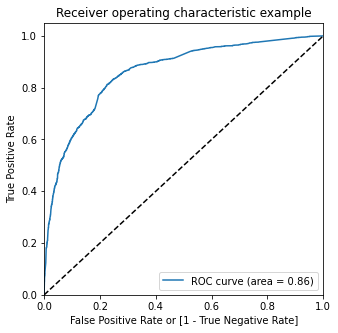

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.903262,592648,1,1,1,1,1,1,1,1,1,1,1
1,1,0.861812,649186,1,1,1,1,1,1,1,1,1,1,0
2,0,0.551804,599615,1,1,1,1,1,1,1,0,0,0,0
3,0,0.457653,593559,0,1,1,1,1,1,0,0,0,0,0
4,1,0.952243,629447,1,1,1,1,1,1,1,1,1,1,1


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388304  1.000000  0.000000
0.1   0.1  0.571937  0.962948  0.323723
0.2   0.2  0.734530  0.893227  0.633789
0.3   0.3  0.777692  0.845418  0.734699
0.4   0.4  0.791306  0.779283  0.798938
0.5   0.5  0.788676  0.643825  0.880627
0.6   0.6  0.781095  0.562948  0.919575
0.7   0.7  0.770111  0.493227  0.945878
0.8   0.8  0.737314  0.370518  0.970157
0.9   0.9  0.687655  0.214741  0.987860


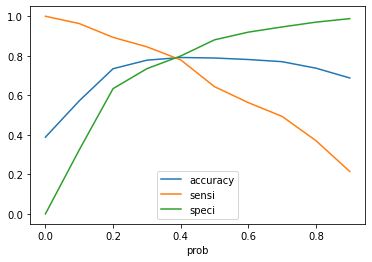

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['predicted_new'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_new
0,0,0.903262,592648,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.861812,649186,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.551804,599615,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.457653,593559,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.952243,629447,1,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Confusion matrix 
confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_new )
print(confusion)

[[3482  472]
 [ 894 1616]]


In [99]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_new))

0.791305693069307


### Making predictions on the test set

In [100]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [101]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [102]:
X_test_sm.shape

(2771, 11)

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred_final = pd.DataFrame({'Converted_test':y_test.values, 'Conversion_Probability_test':y_test_pred})
y_test_pred_final['Lead ID'] = y_test.index
y_test_pred_final.head()

,Converted_test,Conversion_Probability_test,Lead ID
Lead Number,,,
613326,1,0.129976,613326
640752,1,0.076691,640752
608893,1,0.785956,608893
594636,0,0.076691,594636
649244,1,0.227506,649244


In [105]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Probability_test.map(lambda x: 1 if x > 0.4 else 0)

In [106]:
y_test_pred_final.head()

,Converted_test,Conversion_Probability_test,Lead ID,final_predicted
Lead Number,,,,
613326,1,0.129976,613326,0
640752,1,0.076691,640752,0
608893,1,0.785956,608893,1
594636,0,0.076691,594636,0
649244,1,0.227506,649244,0


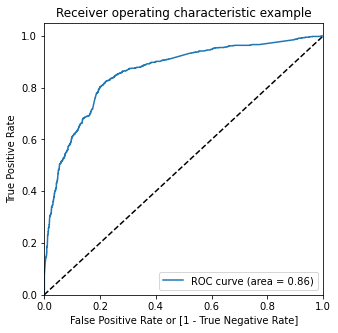

In [109]:
draw_roc(y_test_pred_final.Converted_test, y_test_pred_final.Conversion_Probability_test)

In [634]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted_test, y_test_pred_final.final_predicted)

0.7982677733670155

In [116]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted_test, y_test_pred_final.final_predicted )
confusion2

array([[1393,  329],
       [ 230,  819]], dtype=int64)

In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        1393       329
# converted            230        819  

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.780743565300286

In [119]:
#  specificity of our logistic regression model
TN / float(TN+FP)

0.8089430894308943

In [120]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7134146341463414